# Heart Disease Prediction

In [90]:
# importing the dataset

import pandas as pd
df = pd.read_csv('heart.csv')

## 1. Understanding the Data

The dataset consists of the following 13 features:
1. age *(continuous)*
2. sex *(categorical)*
3. chest pain type *(categorical - 4 values)*
4. resting blood pressure *(continuous)*
5. serum cholestoral in mg/dl *(continuous)*
6. fasting blood sugar *(categorical > 120 mg/dl )*
7. resting electrocardiographic results *(categorical - values 0,1,2)*
8. maximum heart rate achieved *(continuous)*
9. exercise induced angina *(categorical)*
10. oldpeak = ST depression induced by exercise relative to rest *(continuous)*
11. the slope of the peak exercise ST segment *(categorical)*
12. number of major vessels *(categorical - values 0-3)*
13. thal *(categorical 0 = normal; 1 = fixed defect; 2 = reversable defect)*

Below are some statistics from the data.

In [91]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### 1.1 Boxplots for all continuous Features

In [92]:
numerical_columns = list(df.loc[:,['age', 'trestbps','chol', 'thalach', 'oldpeak']])
categorical_columns = list(df.loc[:,['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']])

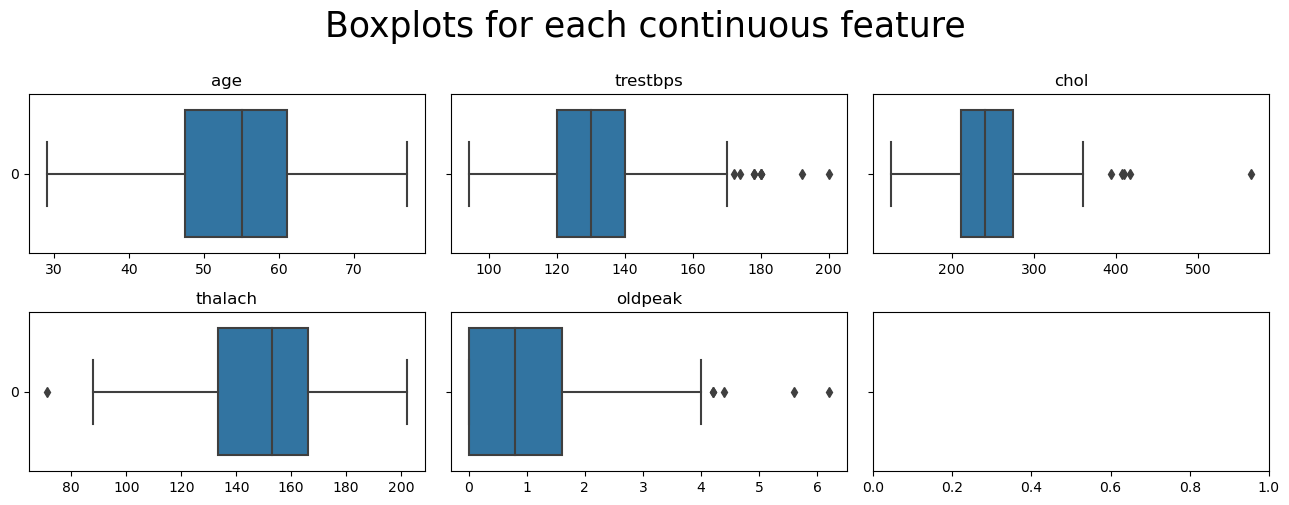

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle('Boxplots for each continuous feature',y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numerical_columns, rows=2, cols=3)
plt.tight_layout()

We can observe that almost all the numerical features contain a few outliers

### 1.2 Histograms for all continuous features

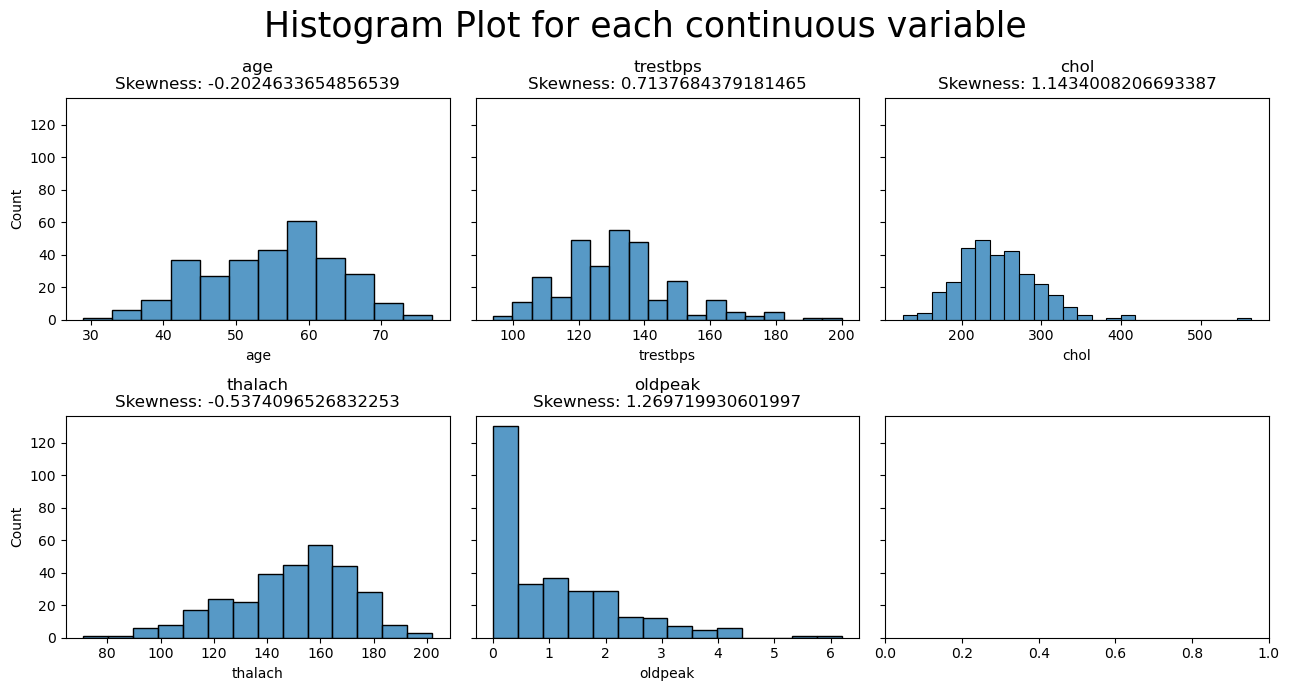

In [94]:
def colDistri(dataset,columns_list, rows, cols, sp, width, height):

    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(width,height))
    fig.suptitle('Histogram Plot for each '+ sp +' variable', fontsize=25)
    axs = axs.flatten()


    for i, data in enumerate(columns_list):
        sns.histplot(data=dataset, x = data, ax=axs[i])
        if sp == "continuous":
            skewness = dataset[data].skew(axis = 0, skipna = True)
            axs[i].set_title(data +'\nSkewness: ' + str(skewness))
        else:
            axs[i].set_title(data)

colDistri(df, numerical_columns, 2, 3, "continuous", 13, 7)
plt.tight_layout()

We can see that only the age feature can be considered as normally distributed. We have to take that into account when deciding on the outlier detection methods.

### 1.3 Histograms for all categorical values

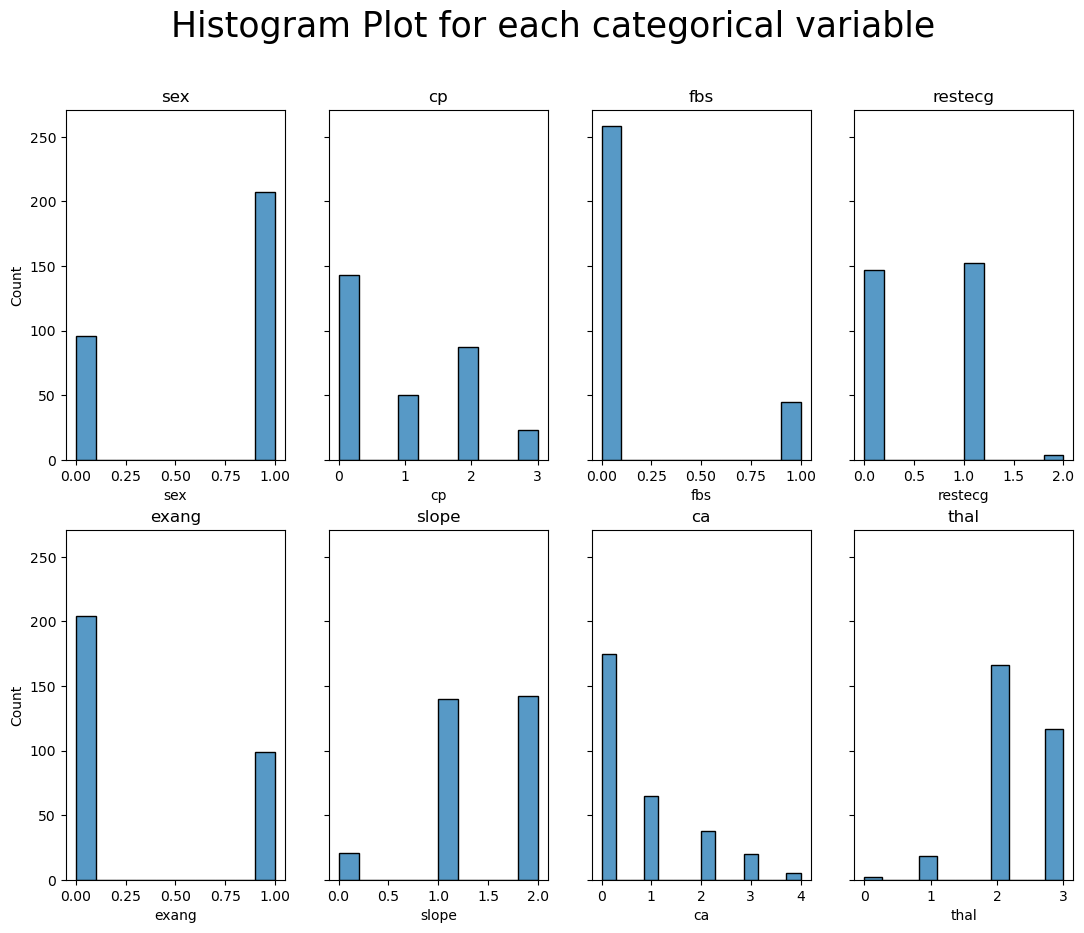

In [95]:
colDistri(df, categorical_columns, 2, 4, "categorical", 13, 10)

### 1.4 Visualizing Data for Affected Patients

In this part of our pipeline, we filtered out the affected patients (target = 1), in order to visualize and gain more insight about the data. We plotted 2 graphs, a graph which shows the proportion of affected males in comparison to females, and a graph that shows the number of affected patients for each age group.

In [96]:
#Filtering out only the patients with heart diseases
with_disease = df.copy()
with_disease = with_disease[with_disease['target'].isin([1])]
with_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [97]:
gender_counts = with_disease.sex.value_counts()
gender_counts

1    93
0    72
Name: sex, dtype: int64

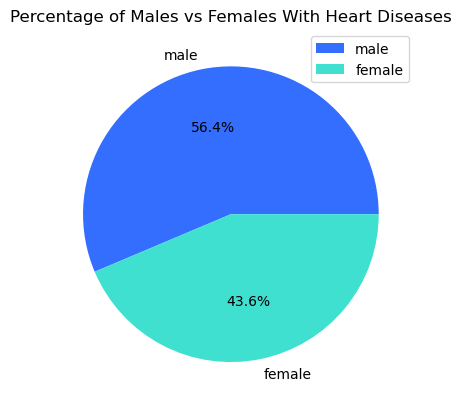

In [98]:
import matplotlib.pyplot as plt
import seaborn
plt.pie(gender_counts, labels = ["male", "female"],colors = ["#336EFF","turquoise"],autopct='%1.1f%%',)
plt.title("Percentage of Males vs Females With Heart Diseases")
plt.legend()
plt.show()

The following pie chart shows us that the percentage of overall affected males is larger than the percentage of the affected females by a considerable margin.

In [99]:
with_disease['age_group']=pd.cut(with_disease['age'],
                               bins=[28, 40, 50, 60, 999], 
                               labels=['29-40', '41-50', '51-60','60+'])
with_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60+
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,29-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1,51-60
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1,51-60
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1,41-50
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,29-40


In order to plot the bar chart of affected patients for different age groups, the first thing we need to do is categorize the age. This was done by dividing our data into 4 different age groups which are: 29-40, 41-50, 51-60 and 60+.

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Number of Patients')]

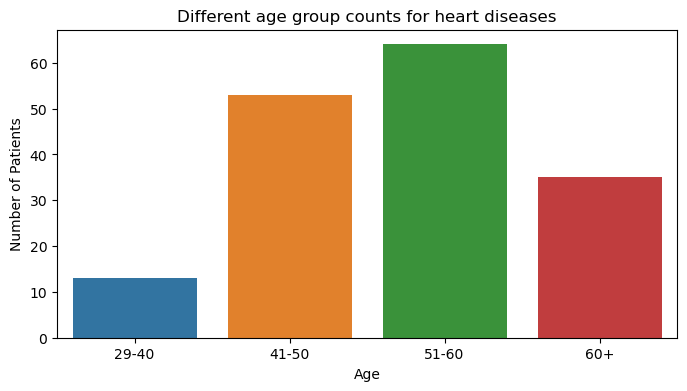

In [100]:
import seaborn as sns
age_group_counts = with_disease.age_group.value_counts()
plt.figure(figsize=(8, 4))
plt.title("Different age group counts for heart diseases")
ax=sns.barplot(x=age_group_counts.index, y=age_group_counts);
ax.set(xlabel='Age', ylabel='Number of Patients')

## 2. Preprocessing

### 2.1 Checking for missing data

In [101]:
print (df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


No missing values were detected. Therefore no need for data filling techniques

### 2.2 Detecting Outliers

We considered 2 methods for outlier detection: Inter Quartile Range and Z score. We detected and removed outliers in the numerical features only (age, trestbps, chol, thalach, oldpeak)

#### 2.2.1 Inter Quartile Range (IQR) 
IQR is one of the most extensively used procedure for outlier detection and removal It's so versatile because **it makes no distributional assumptions**. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

In [102]:
def IQR_method (df,features):
   outliers_frame = pd.DataFrame()
   for col in features:
      q1=df[col].quantile(0.25)

      q3=df[col].quantile(0.75)

      IQR=q3-q1

      upper_limit = q3+1.5*IQR
      lower_limit = q1-1.5*IQR

      outliers_frame = pd.concat([outliers_frame, df[(df[col]<lower_limit)|(df[col]>upper_limit)]])

      df = df[~((df[col]<lower_limit)|(df[col]>upper_limit))]
   
   return outliers_frame

In [103]:
# detecting outliers

outliers_IQR = IQR_method(df, numerical_columns)
display(outliers_IQR)
print (outliers_IQR.shape[0] , " Outliers have been detected using the IQR method")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1


19  Outliers have been detected using the IQR method


#### 2.2.2 Z-score

Z-Score is a highly efficient way of detecting and removing outliers. The main issue with it is that it only works with the data which is completely or close to normally distributed, which means that this method is not for skewed data, either left skew or right skew.

In [104]:
def z_score_method(df, features):
    outliers_frame = pd.DataFrame()
    for col in features:
        upper_limit = df[col].mean() + 3*df[col].std()
        lower_limit = df[col].mean() - 3*df[col].std()
        outliers_frame = pd.concat([outliers_frame, df[(df[col] > upper_limit) | (df[col] < lower_limit)]])
        df = df[~(df[col] > upper_limit) | (df[col] < lower_limit)]
    return outliers_frame

In [105]:
outliers_z_score= z_score_method(df, numerical_columns)
display(outliers_z_score)
print (outliers_z_score.shape[0] , " Outliers have been detected using the Z-score method")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


9  Outliers have been detected using the Z-score method


#### 2.2.3 Deleting outliers

Z-score outlier detection and IQR outlier detection yielded different results. From the historgrams sketched above, we can see that none of the features have normal distribution. Therefore, the result generated from the Z-score outlier detection is not accurate because the Z-score method assumes that data is normally distributed. 

Therefore, we will delete the outliers detected using the IQR method

In [106]:
df = pd.concat([df, outliers_IQR]).drop_duplicates(keep=False)
print("The dataframe now consists of ", df.shape[0], " rows")

The dataframe now consists of  282  rows


### 2.3 Data Standardization

In order to measure the correlation between features, we first need to standardize the data, so that all features can have the same range. This is done to ensure that no feature has more effect on correlation and other metrics than the others. The MinMax scaler was used for this step, and it was used because outliers were already filtered out, hence the maximum and minimum values of the data

In [107]:
from sklearn.preprocessing import MinMaxScaler
def scaler(df,arr):
    dataframe_N=df[arr]
    scale = MinMaxScaler(feature_range=(0,1))
    norm_data=scale.fit_transform(dataframe_N)
    return norm_data
df[numerical_columns]=scaler(df,numerical_columns)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.671053,0.457265,1,0,0.543860,0,0.575,0,0,1,1
1,0.166667,1,2,0.473684,0.529915,0,1,0.868421,0,0.875,0,0,2,1
2,0.250000,0,1,0.473684,0.333333,0,0,0.736842,0,0.350,2,0,2,1
3,0.562500,1,1,0.342105,0.470085,0,1,0.789474,0,0.200,2,0,2,1
4,0.583333,0,0,0.342105,0.974359,0,1,0.657895,1,0.150,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0,0.605263,0.491453,0,1,0.307018,1,0.050,1,0,3,0
299,0.333333,1,3,0.210526,0.589744,0,1,0.385965,0,0.300,1,0,3,0
300,0.812500,1,0,0.657895,0.286325,1,1,0.464912,0,0.850,1,2,3,0
301,0.583333,1,0,0.473684,0.021368,0,1,0.236842,1,0.300,1,1,3,0


## 3 Data Analysis

Now that the data is cleaned up and standardized, we can now analyze it and gather some insights

### 3.1 Visualizing relations

To visualize the relations between the features and each other, we used a scatter plot matrix. A scatter plot matrix is a matrix of scatter plots between each pair of features in the dataset

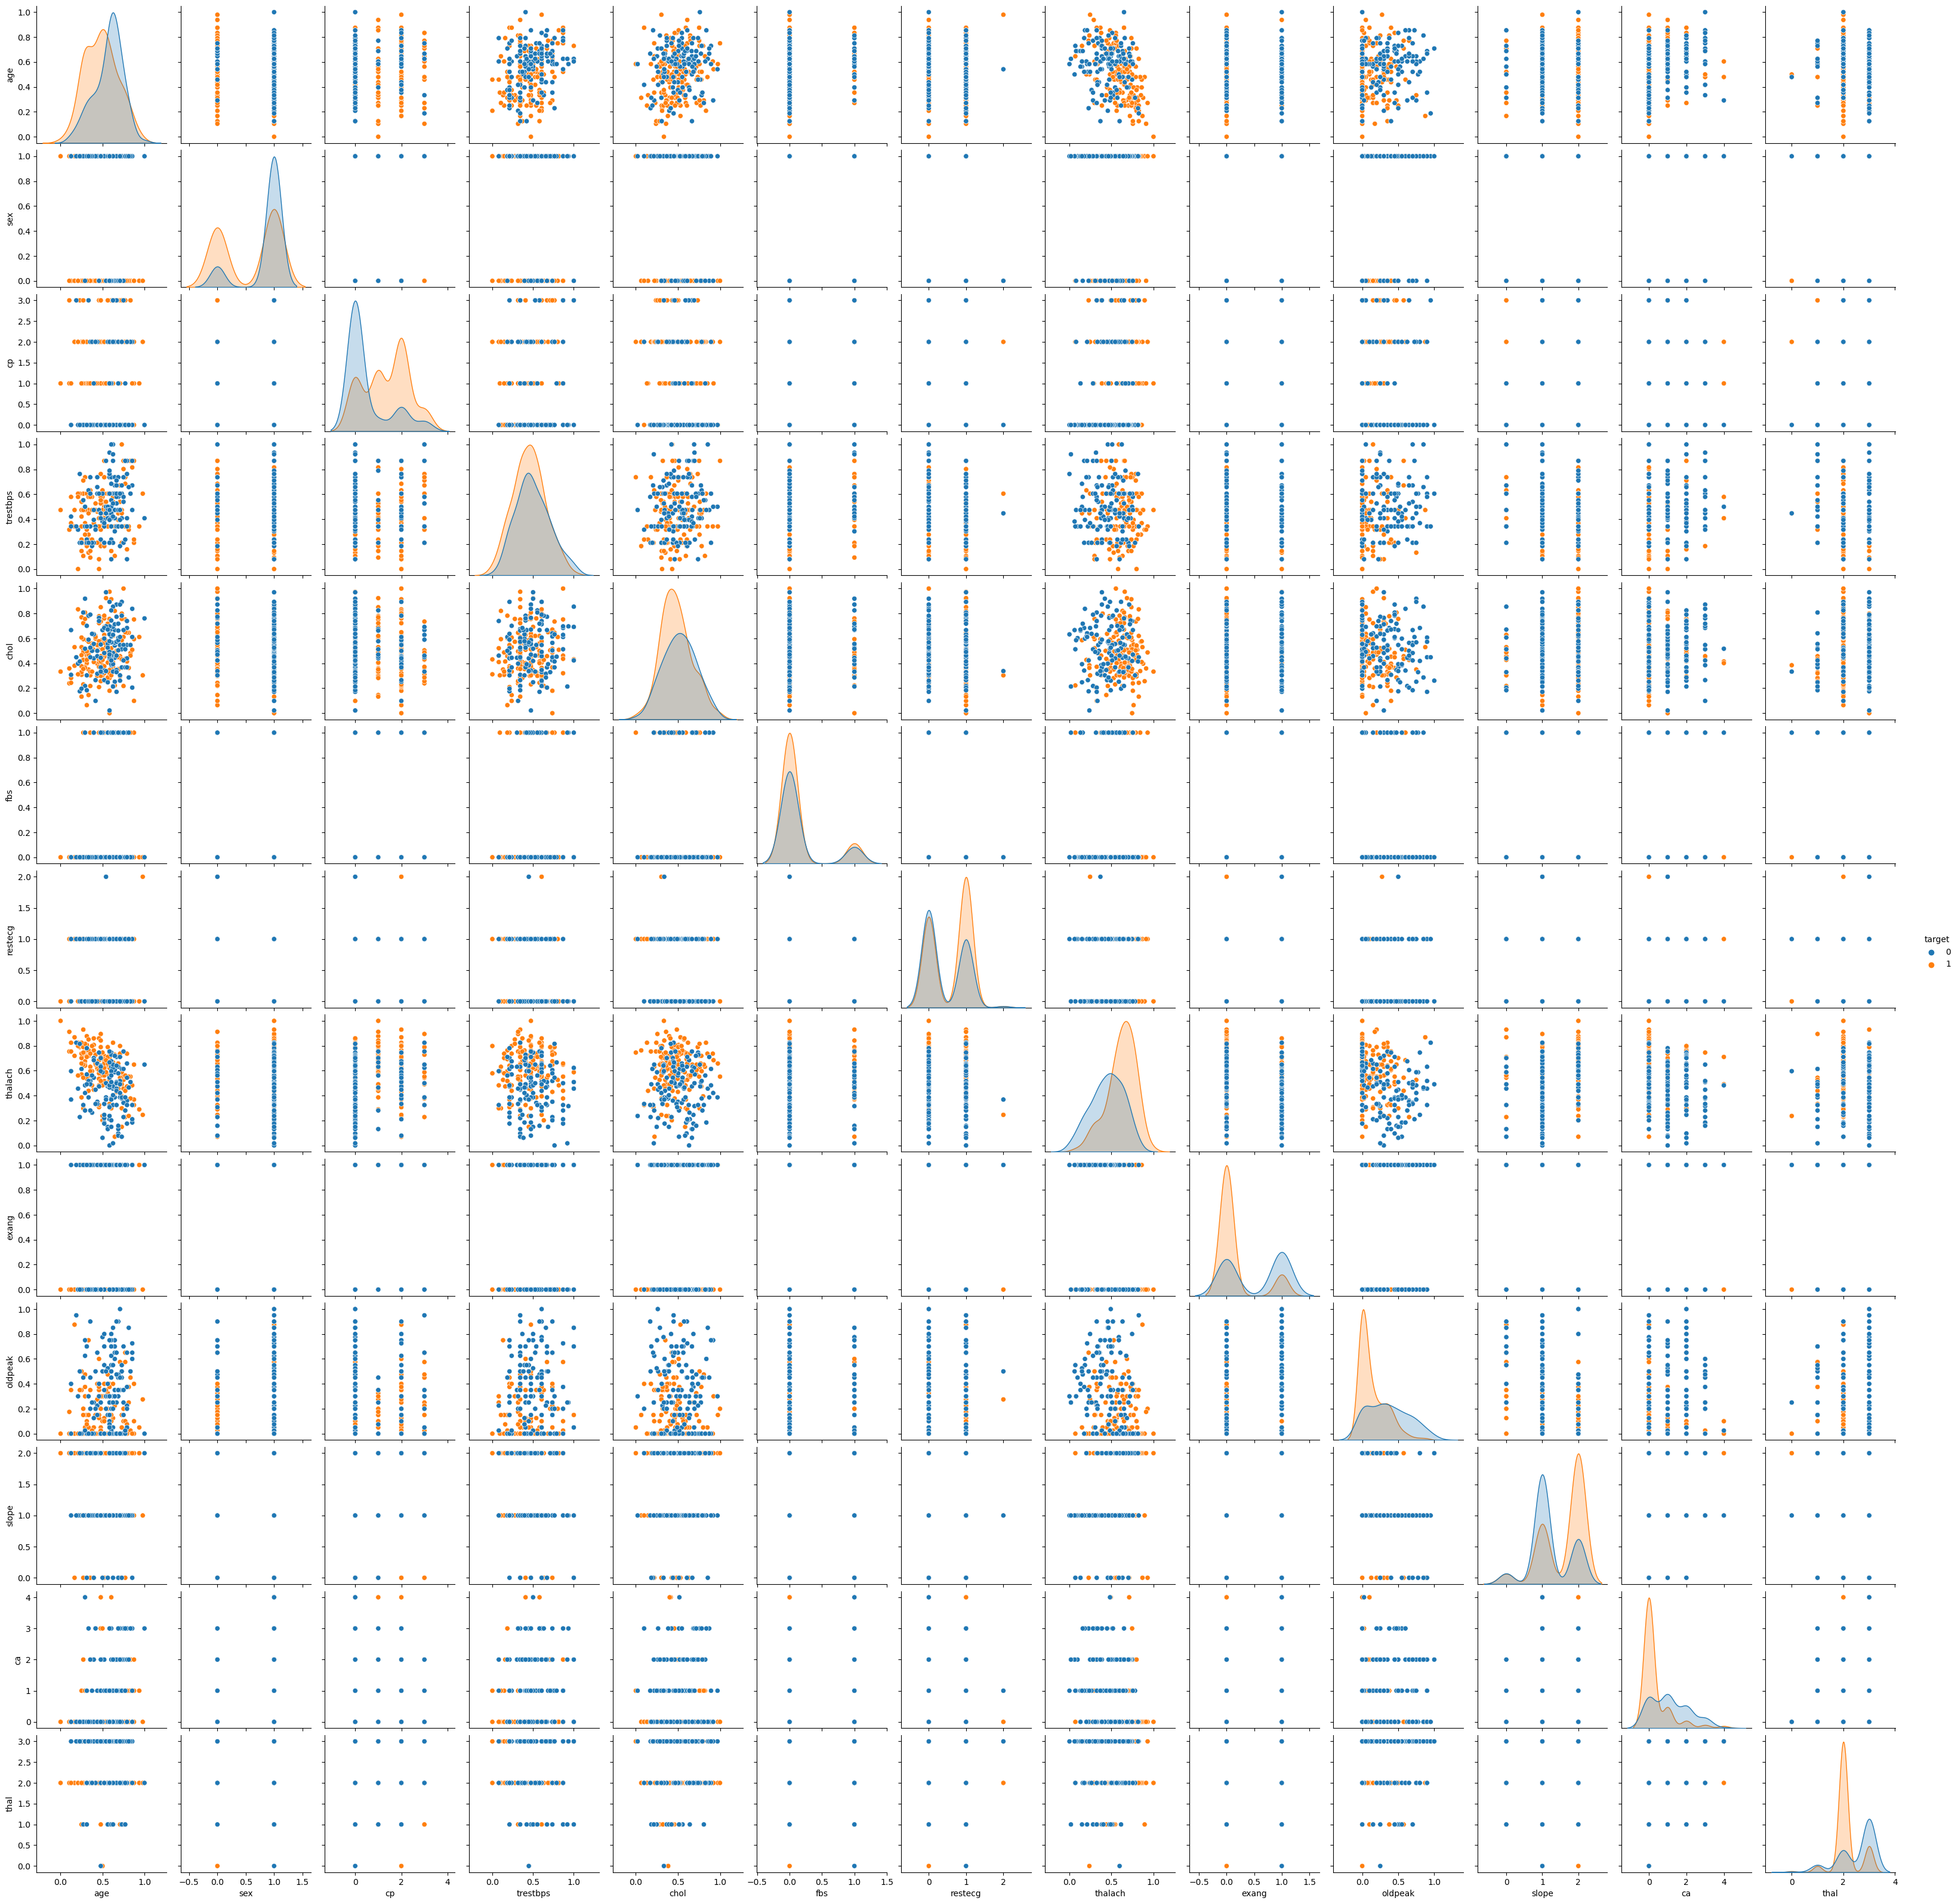

In [108]:
sns.pairplot(df, hue="target")

### 3.2 Visualizing correlations

To visualize how each pair of features are correlated, we calculated the correlations between each pair of features using the pearson's method. These correlation coeffecients are then stored in a matrix and then visualized using a heatmap.

<AxesSubplot:>

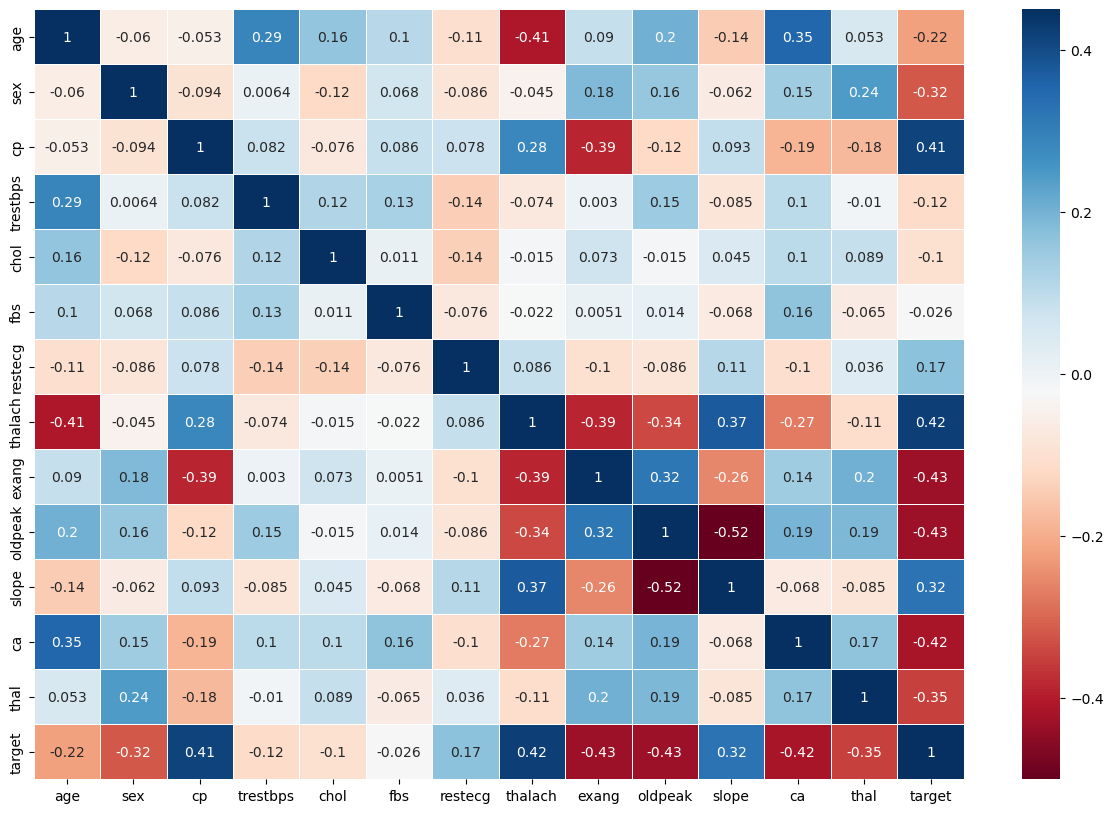

In [109]:
import numpy as np
corr_matrix = df.corr(method='pearson')
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', linewidths=0.5, vmin = -0.5, vmax = 0.45)

### 3.3 Extracting strong relations

Features with strong relations can be great candidates for feature reduction, they can also be really helpful later in the classification if they are strongly related to the target feature.

Since the correlation matrix is symmetric arround its main diagonal, we removed the upper triangle of the correlation matrix to avoid duplicate relations.

In [110]:
lower_triangle = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

In case we need to extract features with various correlation thresholds, we wrote a function to do so.

In [111]:
def get_relations_above_threshold(correlation_matrix, threshold):
    relations = []
    for row in correlation_matrix.index:
        for col in correlation_matrix.columns:
            corr = correlation_matrix[row][col]
            if corr >= threshold or corr <= -threshold:
                relations.append([row,col,corr])
    return relations

As seen from the output, there are no strong relations in the dataset

In [112]:
strong_relations = get_relations_above_threshold(correlation_matrix=lower_triangle, threshold=0.6)
print("Number of strong relations:", len(strong_relations))
print(strong_relations)

Number of strong relations: 0
[]


### 3.4 Extracting moderate relations

In [113]:
moderate_relations = get_relations_above_threshold(correlation_matrix=lower_triangle, threshold=0.4)
print("Number of moderate relations:", len(moderate_relations))
print(moderate_relations)

Number of moderate relations: 7
[['age', 'thalach', -0.40774836267557535], ['cp', 'target', 0.4145063829399915], ['thalach', 'target', 0.42071289254095473], ['exang', 'target', -0.430405057823935], ['oldpeak', 'slope', -0.5236405058765344], ['oldpeak', 'target', -0.43244558796699595], ['ca', 'target', -0.41733204198718815]]


### 3.5 Visualizing moderate relations

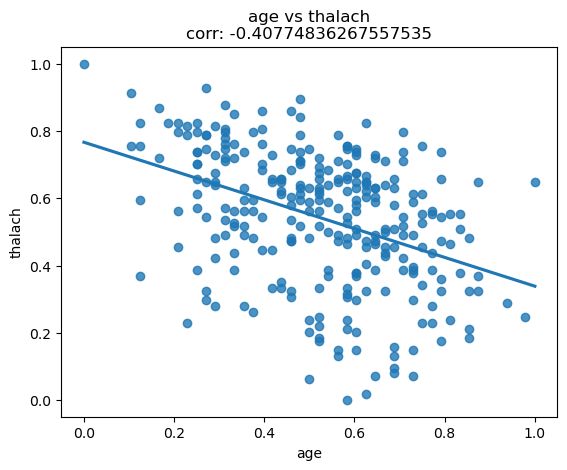

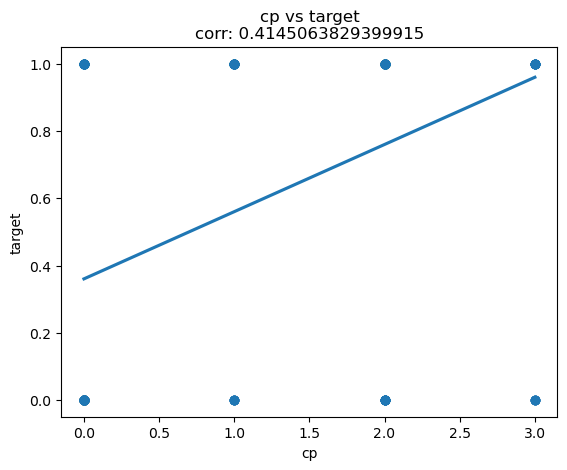

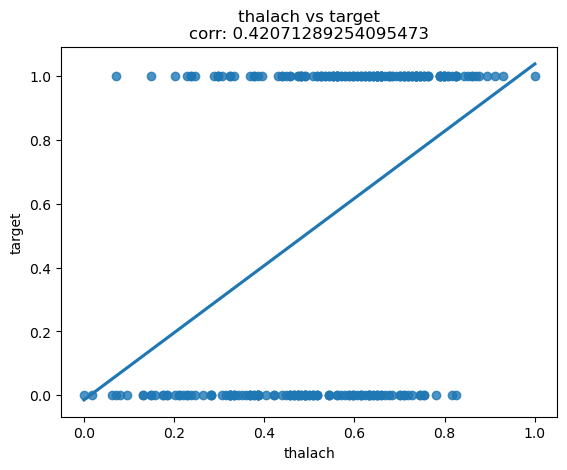

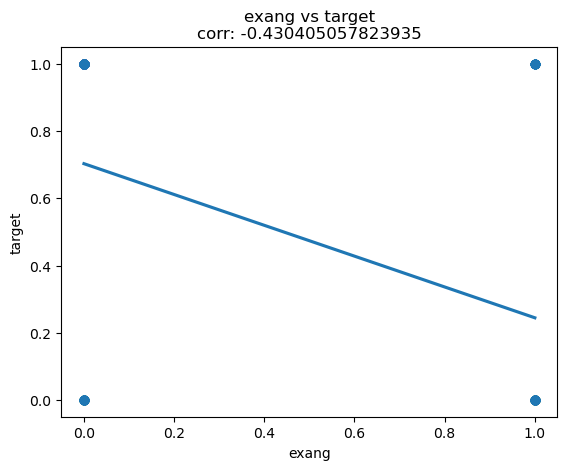

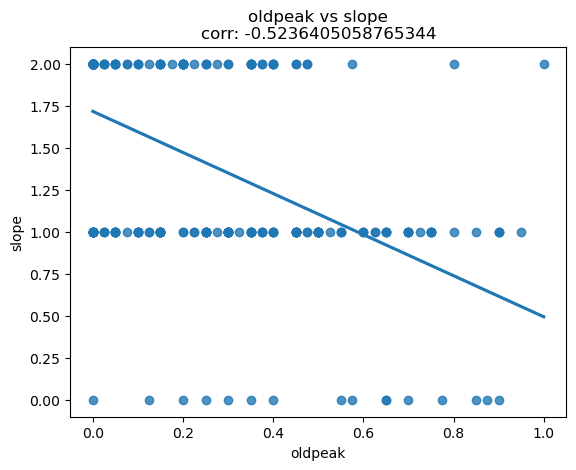

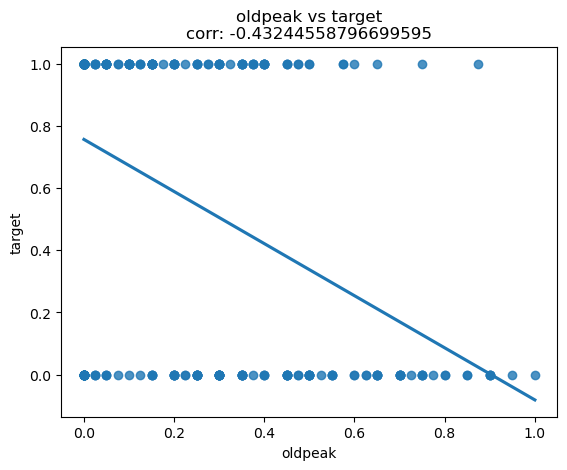

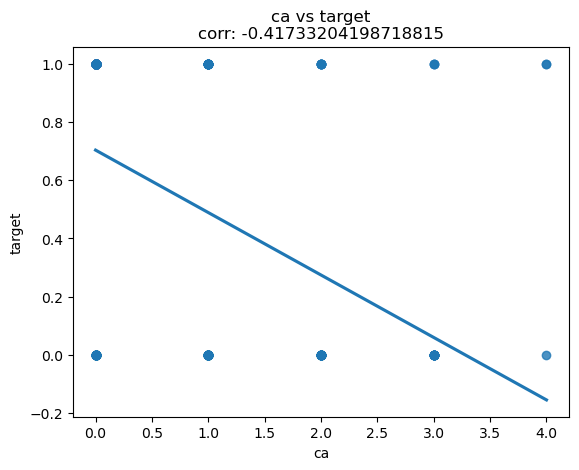

In [114]:
for relation in moderate_relations:
    x = relation[0]
    y = relation[1]
    corr = relation[2]
    plt.figure()
    sns.regplot(x=x, y=y, data=df[[x,y]], fit_reg=True, ci=None)
    plt.title(f"{x} vs {y}\ncorr: {corr}")

## 4 Splitting the Data

For splitting the data, we used stratified sampling and based on the output of the correlation matrix, the feature "exang" has the highest correlation with the target. So we chose this feature as a parameter for the startify. 

In [115]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'],axis=1)
Y = df['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,stratify=df['exang'])
X_train.shape, X_test.shape

((225, 13), (57, 13))

The output shows that the data was split into 80% for training and 20% for testing.

## 5 Classification

### 5.1 Gaussian Naive Bayes

#### 5.1.1 Model Training and Testing

In [116]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

GNBmodel = GaussianNB()

GNBmodel.fit(X_train, Y_train)

Y_pred = GNBmodel.predict(X_test)

GNBA=accuracy_score(Y_test, Y_pred)
print("Gaussian Naive Bayes Model Accuracy:",GNBA)

Gaussian Naive Bayes Model Accuracy: 0.8947368421052632


#### 5.1.2 Evaluation

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[19  1]
 [ 5 32]]

True Positives(TP) =  19

True Negatives(TN) =  32

False Positives(FP) =  1

False Negatives(FN) =  5


<AxesSubplot:>

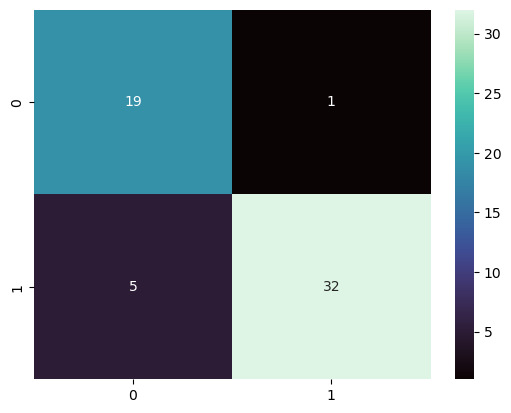

In [118]:
sns.heatmap(cm,annot= True, fmt='d', cmap='mako')

In [119]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

f_score = (2*precision*recall) / (precision+recall)
print('F-Score : {0:0.4f}'.format(f_score))

Classification accuracy : 0.8947
Classification error : 0.1053
Recall or Sensitivity : 0.7917
Specificity : 0.9697
Precision : 0.9500
F-Score : 0.8636


### 5.2 K-Nearest Neighbours

#### 5.2.1 Model Training and Testing

In [120]:
from sklearn.neighbors import KNeighborsClassifier

KNNmodel = KNeighborsClassifier()

# Train K-Nearest Neighbor Classifer
KNNmodel.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = KNNmodel.predict(X_test)

KNNA=accuracy_score(Y_test, Y_pred)
print("K-Nearest Neighbors Model Accuracy:",KNNA)

K-Nearest Neighbors Model Accuracy: 0.8596491228070176


d:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### 5.2.2 Evaluation

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[19  1]
 [ 7 30]]

True Positives(TP) =  19

True Negatives(TN) =  30

False Positives(FP) =  1

False Negatives(FN) =  7


<AxesSubplot:>

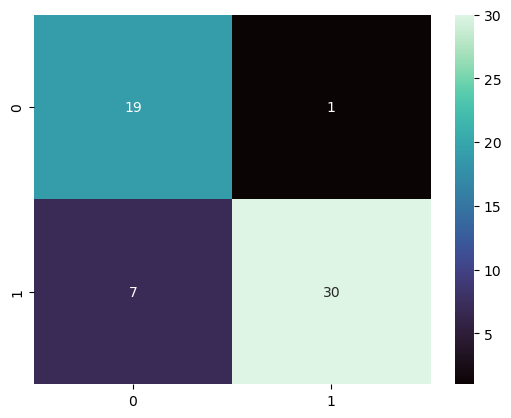

In [122]:
sns.heatmap(cm,annot= True, fmt='d', cmap='mako')

In [123]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

f_score = (2*precision*recall) / (precision+recall)
print('F-Score : {0:0.4f}'.format(f_score))

Classification accuracy : 0.8596
Classification error : 0.1404
Recall or Sensitivity : 0.7308
Specificity : 0.9677
Precision : 0.9500
F-Score : 0.8261


### 5.3 Decision Tree

#### 5.3.1 Model Training and Testing

In [124]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier()

# Train Decision Tree(SVM)
DTmodel.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = DTmodel.predict(X_test)

DTA =accuracy_score(Y_test, Y_pred)
print("Decision Tree Model Accuracy:", DTA )

Decision Tree Model Accuracy: 0.7719298245614035


#### 5.3.2 Visualization

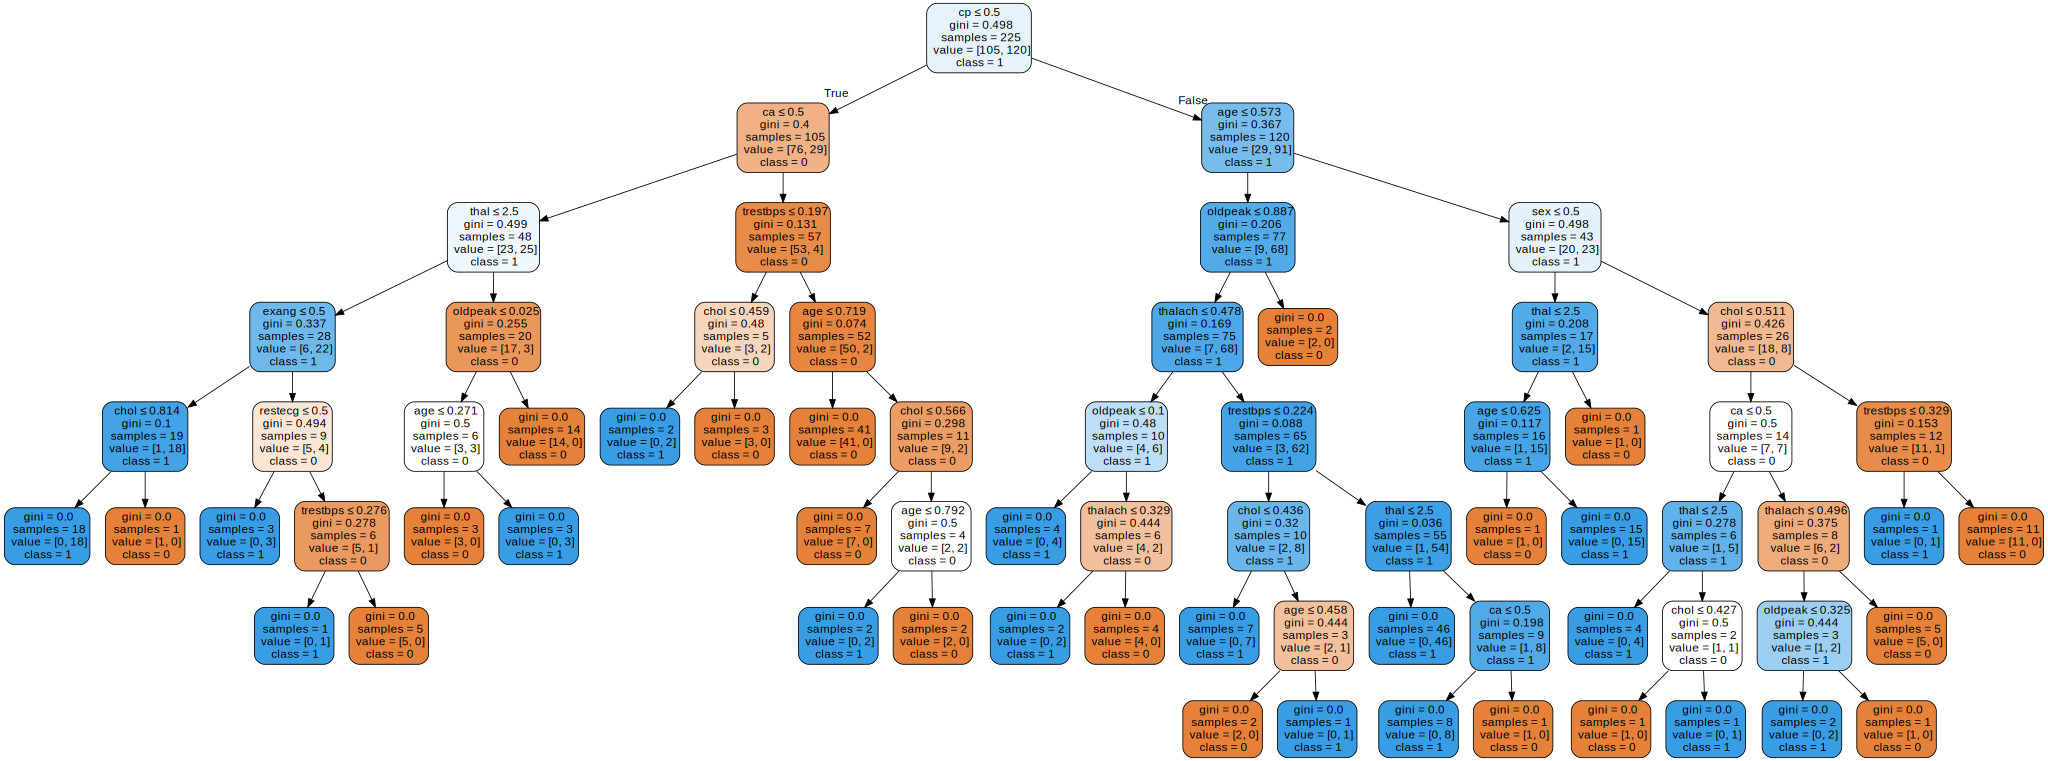

In [125]:
from sklearn import tree
import graphviz 
feature_names=df.drop(['target'],axis=1).columns
class_names=['0','1']

dot_data=tree.export_graphviz(DTmodel,out_file=None,
                             feature_names=feature_names,
                             class_names=class_names,
                             filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data,format='png')
graph

#### 5.3.3 Evaluation

In [126]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[18  2]
 [11 26]]

True Positives(TP) =  18

True Negatives(TN) =  26

False Positives(FP) =  2

False Negatives(FN) =  11


<AxesSubplot:>

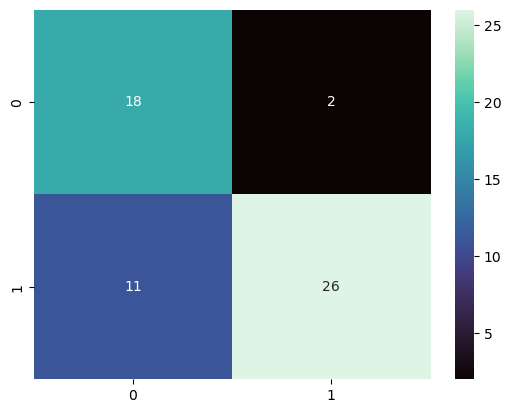

In [127]:
sns.heatmap(cm,annot= True, fmt='d', cmap='mako')

In [128]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

f_score = (2*precision*recall) / (precision+recall)
print('F-Score : {0:0.4f}'.format(f_score))

Classification accuracy : 0.7719
Classification error : 0.2281
Recall or Sensitivity : 0.6207
Specificity : 0.9286
Precision : 0.9000
F-Score : 0.7347


### 5.4 Model Comparison

In [129]:
compare = pd.DataFrame({'Model': ['Gaussian Naive Bayes', 'K-Nearest Neighbour', 'Decision Tree'], 
                        'Accuracy': [ GNBA*100, KNNA*100, DTA*100]})

# --- Create Accuracy Comparison Table ---
compare.style.hide_index().set_properties(**{'font-family': 'Segoe UI'})

C:\Users\Haneen\AppData\Local\Temp\ipykernel_17032\2001784821.py:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  compare.style.hide_index().set_properties(**{'font-family': 'Segoe UI'})


Model,Accuracy
Gaussian Naive Bayes,89.473684
K-Nearest Neighbour,85.964912
Decision Tree,77.192982
